<a href="https://colab.research.google.com/github/Adithyan773/Google-colab-models/blob/main/bank_markiting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install opendatasets

In [ ]:
import pandas as pd
import opendatasets as od
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
od.download('https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing/data')

Skipping, found downloaded files in "./bank-marketing" (use force=True to force download)


In [ ]:
df = pd.read_csv('/content/bank-marketing/bank-additional-full.csv',delimiter=';')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
age=df['age'].unique()
job=df['job'].unique()
marital=df['marital'].unique()
edu=df['education'].unique()
default=df['default'].unique()
housing=df['housing'].unique()
loan=df['loan'].unique()
contact=df['contact'].unique()
month=df['month'].unique()
poutcome=df['poutcome'].unique()


In [ ]:
print(f'age:{age} \n\n job:{job}\n\n martial:{marital}\n\n education:{edu}\n\n any credits:{default}\n\n housing :{housing}\n\n loan:{loan}\n\n contact:{contact}\n\n month:{month}\n\n previous_outcome:{poutcome}')

age:[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89] 

 job:['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

 martial:['married' 'single' 'divorced' 'unknown']

 education:['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

 any credits:['no' 'unknown' 'yes']

 housing :['no' 'yes' 'unknown']

 loan:['no' 'yes' 'unknown']

 contact:['telephone' 'cellular']

 month:['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

 previous_outcome:['nonexistent' 'failure' 'success']


In [ ]:
df1 = df.drop(['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], axis=1)

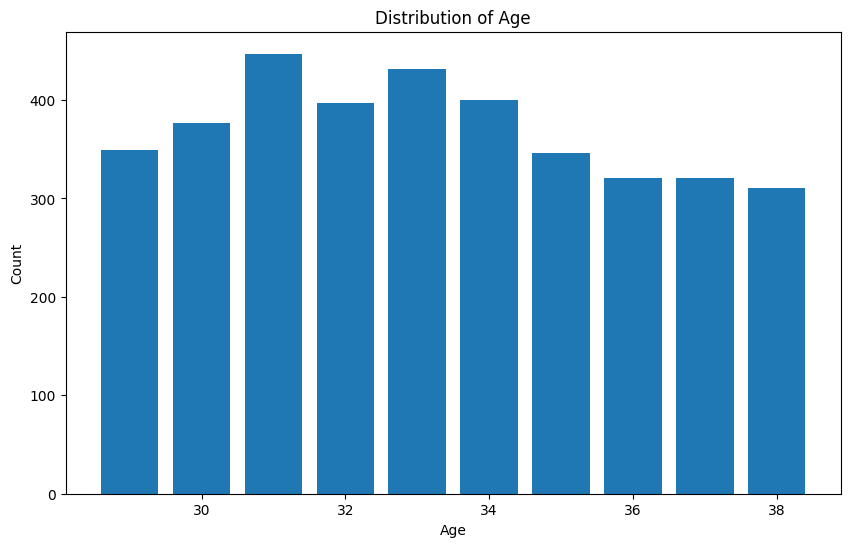

In [ ]:
age_counts = df1['age'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

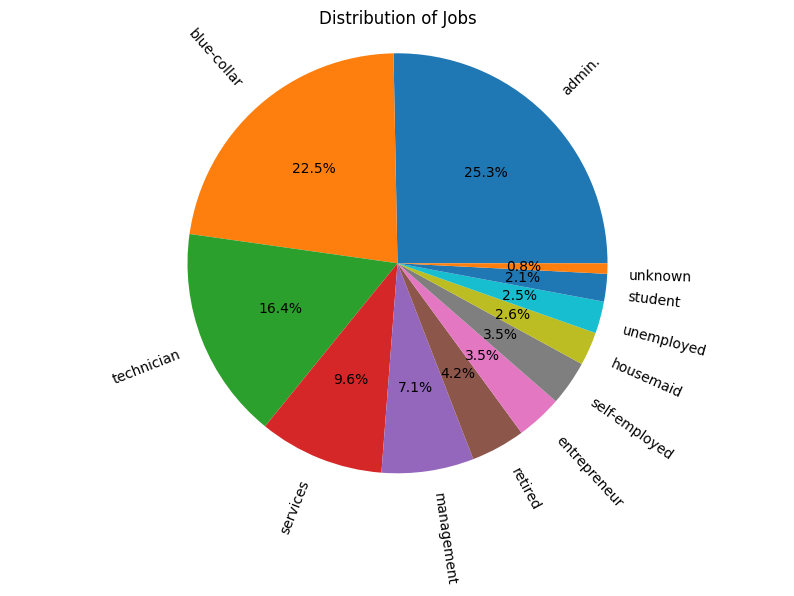

In [ ]:
job_counts = df['job'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%',rotatelabels=90)
plt.title('Distribution of Jobs')
plt.axis('equal')
plt.show()

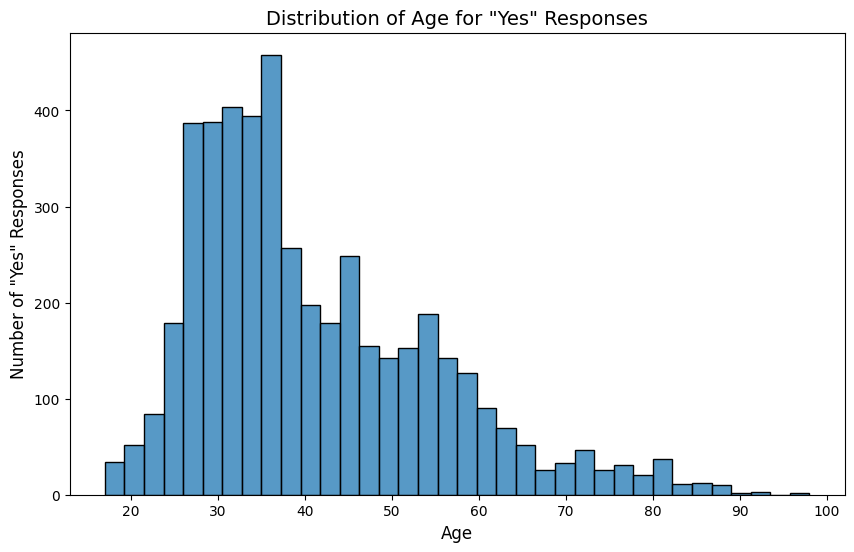

In [ ]:
yes_responses = df1[df1['y'] == 1]
plt.figure(figsize=(10, 6))
sns.histplot(yes_responses['age'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of "Yes" Responses', fontsize=12)
plt.title('Distribution of Age for "Yes" Responses', fontsize=14)
plt.show()

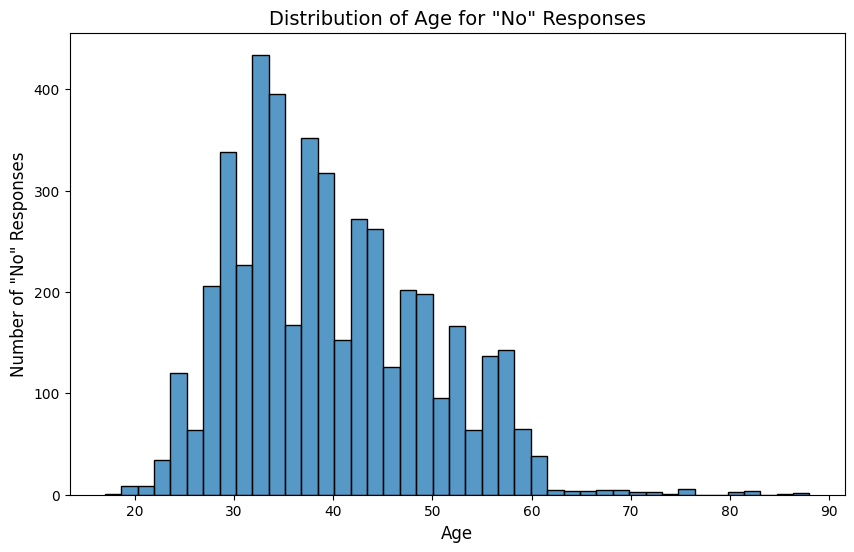

In [ ]:
no_responses = df1[df1['y'] == 0]
plt.figure(figsize=(10, 6))
sns.histplot(no_responses['age'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of "No" Responses', fontsize=12)
plt.title('Distribution of Age for "No" Responses', fontsize=14)
plt.show()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9280 entries, 4155 to 41186
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          9280 non-null   int64
 1   job          9280 non-null   int64
 2   marital      9280 non-null   int64
 3   education    9280 non-null   int64
 4   default      9280 non-null   int64
 5   housing      9280 non-null   int64
 6   loan         9280 non-null   int64
 7   contact      9280 non-null   int64
 8   month        9280 non-null   int64
 9   day_of_week  9280 non-null   int64
 10  duration     9280 non-null   int64
 11  campaign     9280 non-null   int64
 12  pdays        9280 non-null   int64
 13  previous     9280 non-null   int64
 14  poutcome     9280 non-null   int64
 15  y            9280 non-null   int64
dtypes: int64(16)
memory usage: 1.2 MB


In [ ]:
le = LabelEncoder()
df1['job']= le.fit_transform(df1['job'])
df1['marital']= le.fit_transform(df1['marital'])
df1['education']= le.fit_transform(df1['education'])
df1['default']= le.fit_transform(df1['default'])
df1['housing']= le.fit_transform(df1['housing'])
df1['loan']= le.fit_transform(df1['loan'])
df1['contact']= le.fit_transform(df1['contact'])
df1['month']= le.fit_transform(df1['month'])
df1['day_of_week']= le.fit_transform(df1['day_of_week'])
df1['poutcome']= le.fit_transform(df1['poutcome'])
df1['y']= le.fit_transform(df1['y'])

In [ ]:
df1['y'].value_counts()

,count
y,
0,36548
1,4640


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X = df1.drop('y', axis=1)
y = df1['y']
X,Y = rus.fit_resample(X,y)
df1 = pd.concat([X, Y], axis=1)


In [ ]:
df1['y'].value_counts()

,count
y,
0,4640
1,4640


In [ ]:
from sklearn.model_selection import train_test_split
X_train,Y_train,X_test,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((7424, 15), (7424,), (1856, 15), (1856,))

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,X_test)

LogisticRegression(solver='liblinear')

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
pred = lr.predict(Y_train)

In [ ]:
# using knn classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,X_test)
y_pred = knn.predict(Y_train)
print(classification_report(Y_test,y_pred))



              precision    recall  f1-score   support

           0       0.80      0.80      0.80       914
           1       0.80      0.80      0.80       942

    accuracy                           0.80      1856
   macro avg       0.80      0.80      0.80      1856
weighted avg       0.80      0.80      0.80      1856



In [ ]:
#using logistic regression

print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       914
           1       0.86      0.79      0.82       942

    accuracy                           0.82      1856
   macro avg       0.83      0.82      0.82      1856
weighted avg       0.83      0.82      0.82      1856

